In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
data = pd.read_csv('15-Points.csv')
data

,x,y,City
0,5.500000e-08,9.860000e-09,1
1,-2.887330e+01,-7.980000e-08,2
2,-7.929160e+01,-2.140330e+01,3
3,-1.465770e+01,-4.338960e+01,4
4,-6.474730e+01,2.189820e+01,5
5,-2.905850e+01,-4.321670e+01,6
6,-7.207850e+01,1.815810e-01,7
7,-3.603660e+01,-2.161350e+01,8
8,-5.048080e+01,7.374470e+00,9
9,-5.058590e+01,-2.158820e+01,10


In [3]:
def calc_dist(x1, y1, x2, y2):
    d = np.sqrt( ((x1-x2)**2) + ((y1-y2)**2) )
    if d == 0:
        d = math.inf
    return d
        
    
def dist_mat(data,n):
    # key --> City name  ,  value --> distance between current column and all other columns
    dic = {}            
    for i in range(n):
        cityName = data.City[i]
        distance = []
        for j in range(n):
            distance.append(calc_dist(data.x[i], data.y[i], data.x[j], data.y[j]))
        dic[cityName] = distance
    return dic

In [8]:
n = data.shape[0]
distances = dist_mat(data,n)

In [9]:
def nearestNeighbour(df, matrix):
    cost = []
    current = df.City[0]
    start = current
    unvisited = list(*np.array([df.iloc[:,2]])) # store all the cities in the unvisited list
    path = [current]
    unvisited.remove(current)
    
    while len(unvisited):
        nearest_city = np.argmin(matrix[current])  # return the index of the nearest city to the current city

        # if the city already visited so assign its value to infinity to get the next nearest
        if df.City[nearest_city] not in unvisited:
            matrix[current][nearest_city] = math.inf
            continue
        
        cost.append(matrix[current][nearest_city])
        matrix[current][nearest_city] = math.inf
        path.append(df.City[nearest_city])
        current = df.City[nearest_city]
        unvisited.remove(current)
            
    last_cost = np.sqrt(((df.x[0]-df.x[nearest_city])**2) + ((df.y[0]-df.y[nearest_city])**2) )
    cost.append(last_cost)
    path.append(start)
    
    return path, cost
        

In [10]:
dict_copy = dist_mat(data, n)
total_path, total_cost = nearestNeighbour(data, dict_copy)

In [11]:
total_path

[1, 13, 2, 15, 9, 5, 7, 3, 12, 14, 10, 8, 6, 4, 11, 1]

In [12]:
sum(total_cost)

284.3810904080332

### Draw the path

In [13]:
X = [data.x[i-1]  for i in total_path]
Y = [data.y[i-1]  for i in total_path]

In [14]:
%matplotlib inline

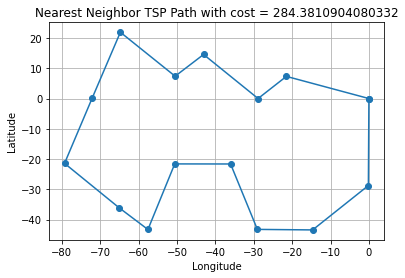

In [15]:
plt.plot(X, Y, '-o')
plt.title(f'Nearest Neighbor TSP Path with cost = {sum(total_cost)}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.show()

### Try to use Matplotlib ginput

In [16]:
%matplotlib qt
# from matplotlib import rcParams
# rcParams['figure.figsize'] = 10,5

In [19]:
def ginput_fun():
    points = []

    # display a plot and wait for the user to click on num_points points
    plt.title(f"Enter points")
    plt.xlim(0, 10)
    plt.ylim(0, 10)
    plt.draw()

    # take input fro
    while True:
        # get the first tuple (first point)
        point = plt.ginput(1)
        if point:
            point=point[0]
        else:
            break
#         print(point)
        points.append(point)
        plt.plot(point[0], point[1], 'go')
        plt.draw()  
        
    # put the points into a dataframe
    point_dicts = [{'x': point[0], 'y': point[1]} for point in points]
    n=len(points)
    city = [i+1 for i in range(n)]
    data = pd.DataFrame(point_dicts)
    data.insert(2, 'City', city)
    
    # calculate the distance matrix for the points
    dic = dist_mat(data,n)
    
    # get the nearest neighbor
    total_path, total_cost = nearestNeighbour(data, dic)
    
    # list of X points
    X = [data.x[i-1]  for i in total_path]
    
    # list of y points
    Y = [data.y[i-1]  for i in total_path]
    
    # list of tuples [(x, y)]
    my_path = [(X[i], Y[i]) for i in range(len(X))]

    
    for i in range(len(my_path)+1):
        try:
            plt.plot([my_path[i][0], my_path[i+1][0]], [my_path[i][1], my_path[i+1][1]], '-o', color='green')
            plt.pause(0.3)
        except:
            continue

    plt.title(f'NNH (TSP) Path with distance = {sum(total_cost)}')
    i = 1
    for x, y in points:
        plt.text(x, y+0.3 ,f'C{i}')
        i+=1
        
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()    

In [20]:
ginput_fun()